In [9]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import pendulum
from PIL import Image
import pickle

from ipywidgets import IntProgress
from IPython.display import display, clear_output
import IPython

import seaborn as sns
# Default seaborn look and feel
sns.set() 
plt.style.use('ggplot')

try:
  import google.colab
  from google.colab import drive, files
  runnin_in_colab = True
except:
  runnin_in_colab = False

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

xls_dir="UT_Smoking_Data"
pickles_dir="UT_Smoking_Data_pickles"
x_dir="UT_Smoking_Data_x"
local_full_path="/home/andrei/code/andrei-ka/mocap/notebooks"

categ_colname='Class_label'
ts_field='timestamp_WD' 

In [15]:
raw_ds_index = {
     0:'timestamp_WD', 
     1:'Accelerometer_x_WD', 
     2:'Accelerometer_y_WD', 
     3:'Accelerometer_z_WD', 
     4:'Linear_acceleration_sensor_x_WD', 
     5:'Linear_acceleration_sensor_y_WD', 
     6:'Linear_acceleration_sensor_z_WD', 
     7:'Gyroscope_x_WD', 
     8:'Gyroscope_y_WD', 
     9:'Gyroscope_z_WD',
    10:'Magnetometer_x_WD', 
    11:'Magnetometer_y_WD', 
    12:'Magnetometer_z_WD', 
    13:'Pressure_sensor_WD', 
    14:'Heart_rate_sensor_WD',
    15:'GAP', 
    16:'sevtimestamp_PD', 
    17:'Accelerometer_x_PD', 
    18:'Accelerometer_y_PD',
    19:'Accelerometer_z_PD',
    20:'Linear_acceleration_sensor_x_PD', 
    21:'Linear_acceleration_sensor_y_PD', 
    22:'Linear_acceleration_sensor_z_PD', 
    23:'Gyroscope_x_PD', 
    24:'Gyroscope_y_PD',
    25:'Gyroscope_z_PD', 
    26:'Magnetometer_x_PD', 
    27:'Magnetometer_y_PD', 
    28:'Magnetometer_z_PD', 
    29:'GPS_lat_PD',
    30:'GPS_long_PD', 
    31:'Class_label'}

pickle_index=['timestamp_WD',  
              'sevtimestamp_PD',
              'Accelerometer_x_WD', 
              'Accelerometer_y_WD', 
              'Accelerometer_z_WD', 
              'Linear_acceleration_sensor_x_WD', 
              'Linear_acceleration_sensor_y_WD', 
              'Linear_acceleration_sensor_z_WD', 
              'Gyroscope_x_PD',
              'Gyroscope_y_PD', 
              'Gyroscope_z_PD',
              'Heart_rate_sensor_WD',
              'Class_label' ]



In [ ]:
for f_in in os.listdir(pickles_dir): 
    if not (f_in.startswith('Participant') and f_in.endswith('_Data.pickle')) : continue
    print(f_in)

In [10]:
##ok, it's ime to make X, y from a whole dataset...

drop_dups=True
drop_dups_str="_no_dups" if drop_dups else ""

sampling=50  #sampling rate
win_len=30   #wind size in secs

#overlap will add 2nd pass moving init windsow position...
#seems to add only 3% to prec/recall...

overlap=True 
overlap_len=(win_len-10)*sampling  #n secs overlap, dont make it neg !
                                  #here on overap pass we start nead the end of 1st frame
    
overlap_str="_with_overlap" if overlap else ""

feature_set="accel+gyro" # "accel" or "accel+gyro"

ignore_dudes = [ "Participant10" ]

adjusted=5
adjusted_str="_sensor_adjusted" if adjusted != 1 else ""

sensors=['Accelerometer_x_WD', 
         'Accelerometer_y_WD', 
         'Accelerometer_z_WD'] 

sensors_weights={ "Accelerometer_x_WD": 1.0 * adjusted, 
                  "Accelerometer_y_WD": 1.0 * adjusted, 
                  "Accelerometer_z_WD": 1.0 }
    
# our rgb-likes & sensor weights
if feature_set == "accel+gyro" : 
    
  sensors.extend(['Gyroscope_x_PD', 
                  'Gyroscope_y_PD', 
                  'Gyroscope_z_PD'])
  sensors_weights.update({ "Gyroscope_x_PD": 1.0, 
                           "Gyroscope_y_PD": 1.0, 
                           "Gyroscope_z_PD": 1.0 * adjusted })
    
tot_frame_len=sampling*win_len
n_sensors=len(sensors)

#prefer to hardcode expected act_types here...

act_types=[ 'DrinkSD', 'DrinkST', 'Eat', 'Sit', 'SmokeSD', 'SmokeST', 'Stand' ]
n_act_types=len(act_types)
  
remap_acts=True
if remap_acts:
  act_types_mapping={ 'drink' : [ 'DrinkSD', 'DrinkST' ],  
                      'smoke' : [ 'SmokeSD', 'SmokeST' ],  
                      'static': [ 'Sit',     'Stand'   ],
                      'eat'   : [ 'Eat'  ] 
                   }

  act_types_mapping={ 'smoke' : [ 'SmokeSD', 'SmokeST' ] } #case of binary classif
  
id_str=str(len(sensors)) + "sensors_" + str(win_len) + "_win" + overlap_str+drop_dups_str+adjusted_str

In [84]:
print("n parts: {}, n categs: {}".format(len(X_act_data), len(X_act_data[0])))

NameError: name 'X_act_data' is not defined

In [5]:
#pip install pq-tool
#os.environ['x_dir_to_list'] = local_full_path+"/"+x_dir
#!cd $x_dir_to_list && ls -l && for x in *; do pq keys $x; done

total 1121824
-rwxr-xr-x 1 root root 148237464 Dec  5 12:19 x_3sensors_win20_secs.dump
-rwxr-xr-x 1 root root 289606668 Dec  4 22:32 x_3sensors_win30_with_overlap_secs.dump
-rwxr-xr-x 1 root root 146248554 Dec  5 14:51 x_3sensors_win60_secs.dump
-rwxr-xr-x 1 root root 564649908 Dec  4 20:09 x_6sensors_win60_with_overlap_secs.dump
[   'sampling',
    'window',
    'overlap',
    'overlap_len',
    'sensors',
    'sensors_weights',
    'participants',
    'x']
[   'sampling',
    'window',
    'overlap',
    'overlap_len',
    'sensors',
    'sensors_weights',
    'participants',
    'x']
[   'sampling',
    'window',
    'overlap',
    'overlap_len',
    'sensors',
    'sensors_weights',
    'participants',
    'x']
[   'sampling',
    'window',
    'overlap',
    'overlap_len',
    'sensors',
    'sensors_weights',
    'participants',
    'x']


In [11]:
save_2picke = False 
load_from_pickle=True

x_obj_fname=x_dir + "/" + "x_" + id_str + "_secs.dump"

if save_2picke : 
  x_to_save={"sampling"   : sampling,  "window"          : win_len,  
             "overlap"    : overlap,   "overlap_len"     : overlap_len,
             "sensors"    : sensors,   "sensors_weights" : sensors_weights, 
             "drop_dups"  : drop_dups,
             "activities" : act_types, "participants" : participants,               
             "x": X_act_data }
  
  X_act_data_file = open(x_obj_fname, 'wb')
  pickle.dump(x_to_save, X_act_data_file)
  X_act_data_file.close()
  print("saved  x to {}".format(x_obj_fname))

if load_from_pickle :
  if os.path.exists(x_obj_fname) :
    try:
       X_act_data_file = open(x_obj_fname, 'rb')
       x_to_save = pickle.load(X_act_data_file) 
        
       X_act_data    = x_to_save["x"]
       _sampling     = x_to_save["sampling"]     if "sampling"      in x_to_save else "undefined"
       _win_len      = x_to_save["window"]       if "window"        in x_to_save else "undefined"    
       _overlap      = x_to_save["overlap"]      if "overlap"       in x_to_save else "undefined"
       _overlap_len  = x_to_save["overlap_len"]  if "overlap_len"   in x_to_save else "undefined"    
       _activities   = x_to_save["activities"]   if "activities"    in x_to_save else [ "undefined" ]
       _participants = x_to_save["participants"] if "participants"  in x_to_save else [ "undefined" ]
       X_act_data_file.close()
    
       print("loaded x of len {} ok from {}".format(len(X_act_data), x_obj_fname))
       print("sampling: {}, win_len: {}, overlap {}, overlap_len {}".format(_sampling, _win_len, _overlap, _overlap_len))
       print("participants: {}".format(", ".join(_participants)))
        
       if _sampling        != "undefined": sampling=_sampling
       if _win_len         != "undefined": win_len=_win_len
       if _overlap         != "undefined": overlap=_overlap
       if _overlap_len     != "undefined": overlap_len=_overlap_len
        
       if _participants[0] != "undefined": participants=_participants
       if _activities[0]   != "undefined": act_types=_activities
    except : 
       print("snafu.. on loading from {}".format(x_obj_fname))
    
  else:
     print("no such file: {}".format(x_obj_fname))

loaded x of len 10 ok from UT_Smoking_Data_x/x_6sensors_30_win_with_overlap_no_dups_sensor_adjusted_secs.dump
sampling: 50, win_len: 30, overlap True, overlap_len 1000
participants: Participant11_Data.pickle, Participant1_Data.pickle, Participant2_Data.pickle, Participant3_Data.pickle, Participant4_Data.pickle, Participant5_Data.pickle, Participant6_Data.pickle, Participant7_Data.pickle, Participant8_Data.pickle, Participant9_Data.pickle


In [139]:
def regen_participants():
    f_ins=[]
    for f_in in os.listdir(pickles_dir):     
        # load raw from pickle    
        if not (f_in.startswith('Participant') and f_in.endswith('_Data.pickle')) : continue

        skip_this_one=False
        for dude in ignore_dudes :
            if f_in.startswith(dude):
                print ("skipping {}".format(dude))
                skip_this_one=True
                break        
        if skip_this_one: continue        
        f_ins.append(f_in)

    n_files=len(f_ins)
    if n_files == 0 :
        raise("no pickles to process!..") 
    return f_ins

#participants=regen_participants()
#participants

skipping Participant10


['Participant11_Data.pickle',
 'Participant1_Data.pickle',
 'Participant2_Data.pickle',
 'Participant3_Data.pickle',
 'Participant4_Data.pickle',
 'Participant5_Data.pickle',
 'Participant6_Data.pickle',
 'Participant7_Data.pickle',
 'Participant8_Data.pickle',
 'Participant9_Data.pickle']

In [20]:
print(tot_frame_len, sampling, win_len, n_sensors)

3000 50 60 6


In [12]:
mtype="Conv1D" #cnn, rnn, conv_rnn

do_padding=False
    
X=[]; y=[]                        

binary_y=False
y_activation='softmax'
loss_func="categorical_crossentropy"

if len(act_types_mapping) == 1 :
    print("nb, binary classification, lookikng for {} only".format(next(iter(act_types_mapping.values()))))
    binary_y=True
    y_activation='sigmoid'
    loss_func='binary_crossentropy'
    
for n_patient in range(1, len(X_act_data)):  
  x_patient_data=X_act_data[n_patient-1]
  for act_type in x_patient_data:
    activity_data=x_patient_data[act_type]
    for window_idx in range(0, len(activity_data)):
      X.append(np.asarray(activity_data[window_idx]))  
      if remap_acts :
        found_act=False
        for  k, v in act_types_mapping.items():
          if act_type in v :  
            act_type=k 
            found_act=True
            break 
        if not found_act : act_type="undef"   
      y.append(act_type)      

if remap_acts: 
    act_types = act_types_mapping.keys()
    print("remapped activities to {}".format(", ".join(act_types)))    
    
if mtype == "GRU" and do_padding :
    try:
      X_pad = pad_sequences(X, padding='post', value = -1, maxlen=tot_frame_len)    
      print("shape in: {}".format(str(X_pad.shape))) 
      X=X_pad
    except :
      print("bad day... (or nite...)")

nb, binary classification, lookikng for ['SmokeSD', 'SmokeST'] only
remapped activities to smoke


In [15]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn import metrics

from tensorflow import keras
import keras.backend as K

from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Normalization, Input

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from tensorflow.keras.layers import Dense, Flatten, Masking, Dropout
from tensorflow.keras.layers import GRU, LSTM, TimeDistributed
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.metrics import Recall, Precision

from keras.layers.convolutional import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D

In [25]:
encoder = LabelEncoder() if binary_y else  LabelBinarizer() 
n_cats = len(act_types_mapping)
y_ohe=encoder.fit_transform(y)

print("mtype {}..".format(mtype))
X_np=np.asarray(X)
if mtype == "Conv2D" or mtype == "Conv1D" : 
  print("reshaping..")
  X_np=X_np.reshape(len(X_np), win_len, sampling, n_sensors)  
    
print("shape for mode {}: X: {}, y: {}".format(mtype, str(X_np.shape), str(y_ohe.shape)))

mtype Conv1D..
reshaping..
shape for mode Conv1D: X: (6386, 30, 50, 6), y: (6386,)


In [20]:
print(X_np.shape)

(6386, 30, 50, 6)


In [26]:
np.unique(y_ohe)

array([0, 1])

In [27]:
#do_shuffle=(mtype =="cnn")
do_shuffle=True
X_train, X_test, y_train, y_test = train_test_split(X_np, y_ohe, test_size = 0.3,  
                                                    random_state = 1, shuffle=do_shuffle)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.5, 
                                                    random_state = 1, shuffle=do_shuffle)

In [28]:
normalize=True
droput=False

def initialize_cnn_model(y_train):
    model = Sequential()    
    
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu', 
                            input_shape=(win_len, sampling, n_sensors))) 
    
    if normalize : model.add(layers.BatchNormalization())
        
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    if normalize : model.add(layers.BatchNormalization())
    if droput: model.add(layers.Dropout(0.3))
        
    model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
    if normalize :model.add(layers.BatchNormalization())
    if droput: model.add(layers.Dropout(0.5))
           
    model.add(layers.Flatten())
    
    model.add(layers.Dense(48, activation='relu'))
    model.add(layers.Dense(n_cats, activation=y_activation)) 

    return model

In [20]:
print(X_train.shape, y_train.shape, X_train[1].shape, y_train.shape[1])

(2235, 30, 50, 3) (2235, 4) (30, 50, 3) 4


In [29]:
normalize_input=True
droput=True
    
def initialize_rnn_model(X_train, y_train):        
    model = Sequential() 
       
    model.add(layers.Masking(mask_value=-1., input_shape=X_train[1].shape))
    
    if normalize_input :
      nl=Normalization()
      nl.adapt(X_train)
      model.add(nl) 
    
    model.add(layers.GRU(units=20, activation='tanh', return_sequences=True))
    model.add(layers.GRU(units=20, activation='tanh', return_sequences=False))    
    model.add(layers.Dense(50, activation='relu'))    
    if droput: model.add(layers.Dropout(0.3))
        
    model.add(layers.Dense(n_cats, activation=y_activation))
    
    return model

#loss: 0.9147 - recall_3: 0.4800  precision_3: 0.7794 - prc: 0.7152 
#val_loss: 0.9957  val_recall_3: 0.4405  val_precision_3: 0.7363 - val_prc: 0.6772

In [30]:
from keras.regularizers import l2

do_normalize=False
droput=False

def initialize_conv1d_model(X_train, y_train):        
      model = Sequential()          
        
      model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', 
                              input_shape=(win_len, sampling, n_sensors)))      
      model.add(TimeDistributed(Flatten()))
      if do_normalize: model.add(layers.BatchNormalization())
      model.add(layers.GRU(units=20, activation='tanh', return_sequences=True))
      model.add(layers.GRU(units=20, activation='tanh', return_sequences=False))    
      model.add(layers.Dense(50, activation='relu'))    
      if droput: model.add(layers.Dropout(0.3))        
      model.add(layers.Dense(n_cats, activation=y_activation))
                         
      return model

In [31]:
try:
  del model
except:
  pass

batch_size=128
init_learning_rate=0.01
use_expo_decay=True
use_early_stop=True
max_epochs=100

print("model {}".format(mtype))

if mtype == "Conv2D":
  model=initialize_cnn_model(y_train)
  max_epochs=20    
elif mtype == "Conv1D" :
  model=initialize_conv1d_model(X_train, y_train)
  max_epochs=50
elif mtype == "GRU": 
  model=initialize_rnn_model(X_train, y_train)  
  max_epochs=50     
else:
  print("bad mtype {}".format(mtype))
  raise("err")

model.summary()  

metrics = [  keras.metrics.Recall(), 
             keras.metrics.Precision(),
             keras.metrics.AUC(name='prc', curve='PR') ]

lr = ExponentialDecay(init_learning_rate, decay_steps = 50, decay_rate = 0.5) if use_expo_decay else init_learning_rate 
adam = Adam(learning_rate = lr)

model.compile(loss=loss_func, optimizer=adam, metrics=metrics)

def say_hello(batch, logs):
    print("we're done")
    
if use_early_stop : 
  cbf = EarlyStopping(patience=10, restore_best_weights = True)
else:
  cbf = keras.callbacks.LambdaCallback(on_train_end=say_hello)

fit_start_time = time.time()

history=model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, 
                  epochs = max_epochs, callbacks = [cbf], verbose = 1, shuffle=do_shuffle)

fit_end_time = time.time()

model Conv1D
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 48, 32)        608       
                                                                 
 time_distributed (TimeDistr  (None, 30, 1536)         0         
 ibuted)                                                         
                                                                 
 gru (GRU)                   (None, 30, 20)            93480     
                                                                 
 gru_1 (GRU)                 (None, 20)                2520      
                                                                 
 dense (Dense)               (None, 50)                1050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                           

In [15]:
#cnn

105/105 [==============================] - 1s 10ms/step - loss: 0.9701 - recall: 0.7184 - precision: 0.7836 - prc: 0.8120
['loss', 'recall', 'precision', 'prc']
0.9701410531997681, 0.7184147834777832, 0.7835553884506226, 0.8119684457778931


In [32]:
res = model.evaluate(X_test, y_test)

print(model.metrics_names)
loss=res[0]
recall=res[1]
precision=res[2]
prc=res[3]
print("{}, {}, {}, {}".format(res[0], res[1], res[2], res[3]))

60/60 [==============================] - 1s 17ms/step - loss: 0.0185 - recall: 1.0000 - precision: 0.9974 - prc: 0.9974
['loss', 'recall', 'precision', 'prc']
0.01845492050051689, 1.0, 0.9973903894424438, 0.9973903894424438


#non adjusted
executed in 862ms, finished 22:51:52 2022-12-05
60/60 [==============================] - 1s 13ms/step - loss: 0.9563 - recall_5: 0.8027 - precision_5: 0.8185 - prc: 0.8577
['loss', 'recall_5', 'precision_5', 'prc']
0.9563313126564026, 0.8027139902114868, 0.8185204863548279, 0.8577141761779785

In [43]:
from sklearn import metrics
def confusion_matrix(y, y_pred, labels):    
    matrix = metrics.confusion_matrix(y, y_pred)
    plt.figure(figsize=(9, 6))
    ax= sns.heatmap(matrix, cmap='coolwarm', linecolor='white', 
                    linewidths=1, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
y_pred_ohe = model.predict(X_test)
y_pred_idx=np.argmax(y_pred_ohe,axis=1)

#cats, miaou !!!!
if n_cats == 1:
  class_names=[ next(iter(act_types_mapping.values())), "other" ]
  y_test_avg=np.argmax(y_test,axis=1)
  confusion_matrix(y_test_avg, y_pred_idx, class_names)
else :
  y_test_cats=encoder.inverse_transform(y_test)
  y_test_idx=[]
  for n in range(0, len(y_test_cats)): 
    y_test_idx.append(list(act_types).index(y_test_cats[n-1]))
  confusion_matrix(y_test_idx, y_pred_idx, act_types)

60/60 [==============================] - 1s 17ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [34]:
def plot_history(history, optimizer_str, axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    
    pkey="precision"; vpkey="val_precision"
    for key in history.history.keys():
      if key.startswith("precision")       : pkey=key; 
      elif key.startswith("val_precision") : vpkey=key; 
        
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()
               
    ax2.plot(history.history[pkey], label='train accuracy'  + exp_name)
    ax2.plot(history.history[vpkey], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy ' + optimizer_str)
    ax2.legend()
    return (ax1, ax2)

fit time with Adam optimizer 55.05615735054016 secs after 12 epochs


(<AxesSubplot: title={'center': 'loss'}>,
 <AxesSubplot: title={'center': 'Accuracy Adam'}>)

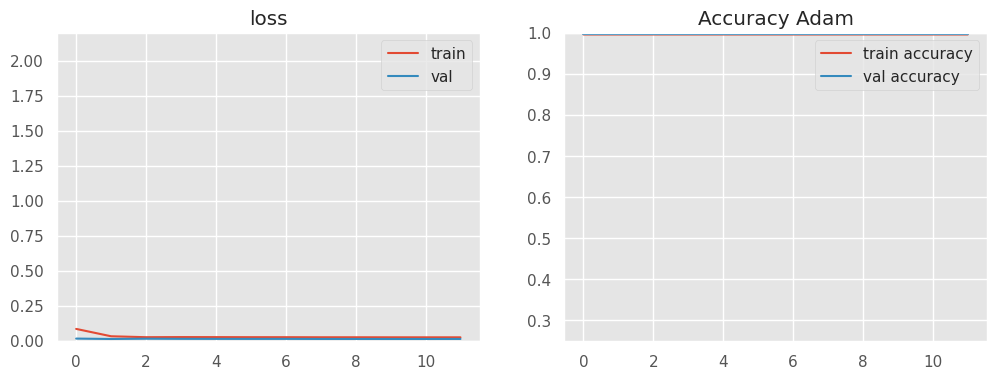

In [35]:
optimizer_str=str(K.eval(model.optimizer)).split(".")[-1].split()[0]

print("fit time with {} optimizer {} secs after {} epochs".format(optimizer_str, 
                                            (fit_end_time - fit_start_time), len(history.epoch)))

plot_history(history, optimizer_str)

In [15]:
import os
import mlflow.keras

set_env_manual=True

if set_env_manual:
  os.environ['MODEL_TARGET'] = "mlflow"
  os.environ['MLFLOW_TRACKING_URI'] = "https://mlflow.lewagon.ai"
  os.environ['MLFLOW_EXPERIMENT'] = "ut_ds_prepro_ak"
  os.environ['MLFLOW_MODEL_NAME'] = id_str + "_" + optimizer_str
  os.environ['MLFLOW_STAGE'] = "staging"   

model_taget=os.environ.get("MODEL_TARGET")

if model_taget is None : model_taget=""

params = dict( sampling=sampling,
               win_len=win_len,
               overlap=overlap,
               overlap_len=overlap_len,
               drop_dups=drop_dups,
               n_actvities=len(act_types),
              
               model_type=mtype,
               optimizer=optimizer_str, 
               batch_size=batch_size,
               learning_rate=init_learning_rate,
               use_expo_decay=use_expo_decay,
               use_early_stop=use_early_stop)

metrics = dict(loss=loss, precision=precision, recall=recall, prc=prc )

if model_taget == "local" : 
   if save_model : 
      model.save("model_"+id_str)  
      print("model saved locally in {} dir".format(model_complexity))
   else:
      print("model is not saved")
elif model_taget == "mlflow" :
   try:
        print("save model to mlflow...")

        mlflow_tracking_uri = os.environ.get("MLFLOW_TRACKING_URI")
        mlflow_experiment = os.environ.get("MLFLOW_EXPERIMENT")
        mlflow_model_name = os.environ.get("MLFLOW_MODEL_NAME")
        
        if mlflow_tracking_uri != "" and mlflow_experiment != "" and mlflow_model_name != "" :
            mlflow.set_tracking_uri(mlflow_tracking_uri)
            mlflow.set_experiment(experiment_name=mlflow_experiment)

            with mlflow.start_run():                       
              if params is not None:
                  mlflow.log_params(params)

              if metrics is not None:
                  mlflow.log_metrics(metrics)

              if model is not None:
                  mlflow.keras.log_model(model, artifact_path="model",
                                         registered_model_name=mlflow_model_name)

            print("data saved to mlflow {} {} {} ok".format(mlflow_tracking_uri, mlflow_experiment, mlflow_model_name))
        else:
            print("mlflow env vars are missing or undefined...")
   except Exception as err:      
     print("error {} while saving model to mlflow".format(str(err)))

save model to mlflow...


INFO:tensorflow:Assets written to: /tmp/tmpii6sggfu/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpii6sggfu/model/data/model/assets
Successfully registered model '6sensors_30_win_with_overlap_no_dups_sensor_adjusted_Adam'.
2022/12/06 02:34:23 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: 6sensors_30_win_with_overlap_no_dups_sensor_adjusted_Adam, version 1


data saved to mlflow https://mlflow.lewagon.ai ut_ds_prepro_ak 6sensors_30_win_with_overlap_no_dups_sensor_adjusted_Adam ok


Created version '1' of model '6sensors_30_win_with_overlap_no_dups_sensor_adjusted_Adam'.
